## Implement a Gradient Descent Algorithms for Logistic Regression.

#### Loading the required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Disbaling 'jedi' to resolve the issue of auto completion
%config Completer.use_jedi = False

#### Loading the data

In [3]:
%%html
<style>
table {float:left}
</style>

| Variable Name | Description |         
| :-----------: |:----------: |
| sbp           | Systolic blood pressure |
| tobacco       | cumulative tobacco (kg) |
| ldl           | low densiity lipoprotein cholesterol |
| adiposity     | index |
| famhist       | family history of heart disease (Present, Absent) |
| typea         | type-A behavior |
| obesity       | index |
| alcohol       | current alcohol consumption  |
| age           | age at onset |
| chd           | response, coronary heart disease |	      

In [4]:
chd_df = pd.read_csv("D:/Study/Data Science/IIMB_BDA Course/Assignment 3/Q3_gradient descent/SAheart.data.csv")

In [5]:
chd_df.head(10)

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
5,6,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,0
6,7,142,4.05,3.38,16.20,Absent,59,20.81,2.62,38,0
7,8,114,4.08,4.59,14.60,Present,62,23.11,6.72,58,1
8,9,114,0.00,3.83,19.40,Present,49,24.86,2.49,29,0
9,10,132,0.00,5.80,30.96,Present,69,30.11,0.00,53,1


In [6]:
chd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
row.names    462 non-null int64
sbp          462 non-null int64
tobacco      462 non-null float64
ldl          462 non-null float64
adiposity    462 non-null float64
famhist      462 non-null object
typea        462 non-null int64
obesity      462 non-null float64
alcohol      462 non-null float64
age          462 non-null int64
chd          462 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB


In [7]:
# chd_df['chd'] = chd_df.chd.astype('object')        # Sklearn Logistic regression required integer response variable not obejct

- **Drop the "row.names" column from the datasets**

In [8]:
chd_df = chd_df.drop('row.names', axis = 1)

In [9]:
# get the summary stats of the variables
chd_df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sbp,462,NaN,NaN,NaN,138.327,20.4963,101,124,134,148,218
tobacco,462,NaN,NaN,NaN,3.63565,4.59302,0,0.0525,2,5.5,31.2
ldl,462,NaN,NaN,NaN,4.74032,2.07091,0.98,3.2825,4.34,5.79,15.33
adiposity,462,NaN,NaN,NaN,25.4067,7.7807,6.74,19.775,26.115,31.2275,42.49
famhist,462,2,Absent,270,NaN,NaN,NaN,NaN,NaN,NaN,NaN
typea,462,NaN,NaN,NaN,53.1039,9.81753,13,47,53,60,78
obesity,462,NaN,NaN,NaN,26.0441,4.21368,14.7,22.985,25.805,28.4975,46.58
alcohol,462,NaN,NaN,NaN,17.0444,24.4811,0,0.51,7.51,23.8925,147.19
age,462,NaN,NaN,NaN,42.816,14.609,15,31,45,55,64
chd,462,NaN,NaN,NaN,0.34632,0.476313,0,0,0,1,1


### Encode the categorical variables.

In [10]:
cat_vars = ['famhist']

In [11]:
for var in cat_vars:
    cat_list = 'var'+'_'+ var
    cat_list = pd.get_dummies(chd_df[var], prefix=var)   # return value is dataframe
    data1=chd_df.join(cat_list)                    # join one df to other
    chd_df=data1

In [12]:
chd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 12 columns):
sbp                462 non-null int64
tobacco            462 non-null float64
ldl                462 non-null float64
adiposity          462 non-null float64
famhist            462 non-null object
typea              462 non-null int64
obesity            462 non-null float64
alcohol            462 non-null float64
age                462 non-null int64
chd                462 non-null int64
famhist_Absent     462 non-null uint8
famhist_Present    462 non-null uint8
dtypes: float64(5), int64(4), object(1), uint8(2)
memory usage: 37.1+ KB


In [13]:
chd_df.famhist_Absent.value_counts()

1    270
0    192
Name: famhist_Absent, dtype: int64

In [14]:
# OneWay cross tabulation
pd.crosstab(index = chd_df.famhist_Absent, columns = 'Count' )

col_0,Count
famhist_Absent,
0,192
1,270


In [15]:
farmhist_class = pd.crosstab(chd_df.famhist, chd_df.chd, margins = True)

In [16]:
farmhist_class.index = ['Absent', 'Present', 'ColTotal']
farmhist_class.columns = ['NO_CHD', 'YES_CHD', 'RowTotal']

In [17]:
type(farmhist_class)

pandas.core.frame.DataFrame

In [18]:
farmhist_class

,NO_CHD,YES_CHD,RowTotal
Absent,206,64,270
Present,96,96,192
ColTotal,302,160,462


**Remove the original categorical variable**

In [19]:
data_vars=chd_df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]    

In [20]:
print('Actual variable - ',data_vars)
print('-'*125)
print('Variables to keep - ',to_keep)

Actual variable -  ['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age', 'chd', 'famhist_Absent', 'famhist_Present']
-----------------------------------------------------------------------------------------------------------------------------
Variables to keep -  ['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age', 'chd', 'famhist_Absent', 'famhist_Present']


In [21]:
chd_final = chd_df[to_keep]
chd_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
sbp                462 non-null int64
tobacco            462 non-null float64
ldl                462 non-null float64
adiposity          462 non-null float64
typea              462 non-null int64
obesity            462 non-null float64
alcohol            462 non-null float64
age                462 non-null int64
chd                462 non-null int64
famhist_Absent     462 non-null uint8
famhist_Present    462 non-null uint8
dtypes: float64(5), int64(4), uint8(2)
memory usage: 33.5 KB


#### Method 2: Encoding of Categorical variables

In [22]:
# from sklearn.preprocessing import LabelEncoder

# lb = LabelEncoder()
# df = chd_df.copy()
# df['Farmhist_code'] = lb.fit_transform(df['famhist'])
# df = df.drop(['famhist', 'famhist_Absent', 'famhist_Present'], axis = 1)
# df.sample(15)

### Normalize the numerical variables

In [23]:
data_vars = chd_final.columns.values.tolist()
cat_vars = ['famhist_Absent', 'famhist_Present', 'chd']
num_vars = [i for i in data_vars if i not in cat_vars ]

print(num_vars)
len(num_vars)

['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']


8

- **Way to identify the numerical columns in the data frame**

In [24]:
# chd_final.dtypes
# num_cols = chd_final.columns[chd_final.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
# print(num_cols)

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
chd_final[num_vars] = pd.DataFrame(scaler.fit_transform(chd_final[num_vars]), columns = num_vars)

In [26]:
chd_final.head(10)

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd,famhist_Absent,famhist_Present
0,0.504274,0.384615,0.331010,0.457902,0.553846,0.332497,0.660371,0.755102,1,0,1
1,0.367521,0.000321,0.239024,0.611748,0.646154,0.444479,0.013996,0.979592,1,1,0
2,0.145299,0.002564,0.174216,0.714406,0.600000,0.452949,0.025885,0.632653,0,0,1
3,0.589744,0.240385,0.378397,0.875245,0.584615,0.542346,0.164821,0.877551,1,0,1
4,0.282051,0.435897,0.175610,0.588531,0.723077,0.354141,0.389565,0.693878,1,0,1
5,0.264957,0.198718,0.382578,0.824336,0.753846,0.504078,0.096066,0.612245,0,0,1
6,0.350427,0.129808,0.167247,0.264615,0.707692,0.191656,0.017800,0.469388,0,1,0
7,0.111111,0.130769,0.251568,0.219860,0.753846,0.263802,0.045655,0.877551,1,0,1
8,0.111111,0.000000,0.198606,0.354126,0.553846,0.318695,0.016917,0.285714,0,0,1
9,0.264957,0.000000,0.335889,0.677483,0.861538,0.483375,0.000000,0.775510,1,0,1


**Data to be fed into gradient descent**

In [27]:
Indep_vars = chd_final.columns.values.tolist()
Indep_vars.remove('chd')  # remove the element from the list (1st matched item)
Indep_vars
dep_vars = ['chd']

print(Indep_vars)
print(dep_vars)

['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age', 'famhist_Absent', 'famhist_Present']
['chd']


In [28]:
X = chd_final[Indep_vars].values
Y = chd_df["chd"]
#Y = chd_final[dep_vars].values

 - **Add columns of '1' to the feature matrix**

In [29]:
intercept = np.ones((X.shape[0],1))
X = np.hstack((intercept, X))

print('Data type of X - ', type(X))
print('Data type of Y - ', type(Y))
print('Shape of X - ', X.shape)
print('Shape of Y - ', Y.shape)

Data type of X -  <class 'numpy.ndarray'>
Data type of Y -  <class 'pandas.core.series.Series'>
Shape of X -  (462, 11)
Shape of Y -  (462,)


### Randomly initialize beta values

In [30]:
# n_beta = (len(chd_final.columns) - 1 + 1)  # Removing target variable col count, Adding beta for base category
# print(n_beta)

# betaArray_ls = ([[] for i in range(n_beta)])
# betaArray_ls

# import random
# #random.seed(123)

# for i in range(n_beta):
#     betaArray_ls[i] = random.random()

# # check the beta array
# betaArray_ls

In [31]:
import random

def initialize_beta( dim ):
    w = np.random.rand( dim ) 
   # w = w.reshape(dim,1)
    return w 

In [32]:
betaArray = np.array(initialize_beta(chd_final[Indep_vars].shape[1] + 1))

print('Data type of betaArray - ', type(betaArray))
print('Shape of betaArray - ', betaArray.shape)
print('-'*80)
print('Beta values - ', betaArray)

Data type of betaArray -  <class 'numpy.ndarray'>
Shape of betaArray -  (11,)
--------------------------------------------------------------------------------
Beta values -  [0.41236018 0.965492   0.9187604  0.0146348  0.85313846 0.90240959
 0.33817588 0.12769646 0.64204363 0.37719722 0.29413808]


### Define a sigmoid function to predict Y

In [33]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [34]:
def predict_Y( betaArray, X ):
    z = np.dot(X, betaArray)     # column vector of (mx1)
    h = sigmoid(z)               # predicted y
    return h

**Checking the functionality**

In [35]:
z = np.dot(X, betaArray)     # column vector of (mx1)
h = sigmoid(z)               # predicted y

print('Data type of Y_hat - ', type(h))
print('Shape of Y_hat - ', h.shape)
print('-'*80)
print('Y_hat values - ', h[450:462])

Data type of Y_hat -  <class 'numpy.ndarray'>
Shape of Y_hat -  (462,)
--------------------------------------------------------------------------------
Y_hat values -  [0.88282313 0.879508   0.95322049 0.93732612 0.94309917 0.91163822
 0.9700556  0.97707577 0.96708611 0.8926542  0.94604965 0.93638341]


### Define a function for calculating binary cross entropy loss function.
<img src="img123.gif">

In [36]:
# def loss_function(betaArray, X, Y):
#     h = predict_Y(betaArray, X)
    
#     first = np.multiply(-Y, np.log(h))    # element-wise multiplication
#     second = np.multiply(-(1-Y), np.log(1-h))
#     logloss = np.sum(first + second)/ (len(X))
    
#     return logloss

In [37]:
def loss_function(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

### Define a function for updating beta values. 

<img src="gradient.gif">

In [38]:
def update_beta( X, Y, h, betaArray, learning_rate ):
    gradient = np.dot(X.T, (h - Y)) /(len(X))
    beta = betaArray - learning_rate*gradient
    
    return beta

**Checking the functionality**

In [39]:
learning_rate = 0.01
gradient = np.dot(X.T, (h - Y)) /(len(X))
beta = betaArray - learning_rate*gradient

print('Shape of gradient - ', gradient.shape)
print('Shape of beta - ', beta.shape)

Shape of gradient -  (11,)
Shape of beta -  (11,)



### Function to iterarte Gradient Descent

In [41]:
betaArray = initialize_beta(X.shape[1])
print( "Initial guess of beta's: ", betaArray) 

Initial guess of beta's:  [0.07559505 0.01257603 0.88392524 0.11509934 0.32034461 0.87194101
 0.01041048 0.81554038 0.92999944 0.39716999 0.19788854]


In [42]:
def logisticRegression_grad(betaArray, num_iter, learning_rate):
    iter_num = 0
    total_cost = []
    
    for i in range(num_iter):
        Y_hat           = predict_Y(betaArray, X)
        this_cost       = loss_function(Y_hat, Y)
        prev_betaArray  = betaArray
        betaArray       = update_beta(X, Y, Y_hat, prev_betaArray,learning_rate)

        if iter_num % 10000 == 0:
            print( "iteration:[", iter_num, "]: ", " - [Cost: ]", this_cost )
            
        total_cost.append( this_cost )
        iter_num += 1        

    print( "\n\nFinal estimates of beta's: ", betaArray )
    plt.plot( range(iter_num), total_cost )
    
    return betaArray

[Understanding of binary cross entropy](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a)

### Plot the cost function for different alpha (learning  parameters) values. E.g. 0.01, 0.001, 0.0001

**LR = 0.01**

iteration:[ 0 ]:   - [Cost: ] 1.2953921389327312
iteration:[ 10000 ]:   - [Cost: ] 0.5312444315909424
iteration:[ 20000 ]:   - [Cost: ] 0.5214984065497275
iteration:[ 30000 ]:   - [Cost: ] 0.5170431940777847
iteration:[ 40000 ]:   - [Cost: ] 0.5146161793283862
iteration:[ 50000 ]:   - [Cost: ] 0.5132269906802746
iteration:[ 60000 ]:   - [Cost: ] 0.5124082228641201
iteration:[ 70000 ]:   - [Cost: ] 0.5119137007979179
iteration:[ 80000 ]:   - [Cost: ] 0.5116081125633584
iteration:[ 90000 ]:   - [Cost: ] 0.5114149475324159
iteration:[ 100000 ]:   - [Cost: ] 0.5112899543492933
iteration:[ 110000 ]:   - [Cost: ] 0.5112070483627239
iteration:[ 120000 ]:   - [Cost: ] 0.5111505973577964
iteration:[ 130000 ]:   - [Cost: ] 0.5111110918034448
iteration:[ 140000 ]:   - [Cost: ] 0.5110826636913172


Final estimates of beta's:  [-3.1225405   0.74516614  2.4685206   2.46968429  0.43327609  2.47167877
 -1.6409738   0.02562541  2.26321175 -1.76312393 -0.83995309]


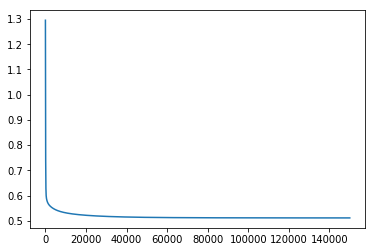

In [43]:
BetaCoefficients_01 = logisticRegression_grad(betaArray,num_iter=150000, learning_rate = 0.01 )

**LR = 0.001**

iteration:[ 0 ]:   - [Cost: ] 1.2953921389327312
iteration:[ 10000 ]:   - [Cost: ] 0.5739305338318125
iteration:[ 20000 ]:   - [Cost: ] 0.5607357075471434
iteration:[ 30000 ]:   - [Cost: ] 0.5532735729782814
iteration:[ 40000 ]:   - [Cost: ] 0.5478060800368773
iteration:[ 50000 ]:   - [Cost: ] 0.5435340874830983
iteration:[ 60000 ]:   - [Cost: ] 0.5401041983565972
iteration:[ 70000 ]:   - [Cost: ] 0.5372936713213069
iteration:[ 80000 ]:   - [Cost: ] 0.5349483624097481
iteration:[ 90000 ]:   - [Cost: ] 0.5329586012892531
iteration:[ 100000 ]:   - [Cost: ] 0.5312451340954195
iteration:[ 110000 ]:   - [Cost: ] 0.5297499141767091
iteration:[ 120000 ]:   - [Cost: ] 0.5284298748519871
iteration:[ 130000 ]:   - [Cost: ] 0.5272526548917302
iteration:[ 140000 ]:   - [Cost: ] 0.5261936288531173


Final estimates of beta's:  [-1.97628727  0.29320511  1.68978598  0.95392647  0.34205107  0.61051629
 -0.57511561  0.3218753   1.90569517 -1.19927398 -0.25754982]


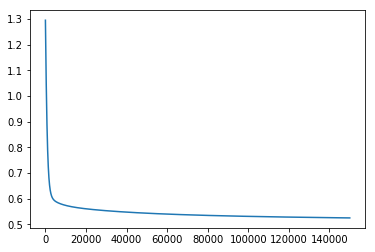

In [44]:
BetaCoefficients_001 = logisticRegression_grad(betaArray,num_iter=150000, learning_rate = 0.001 )

**LR = 0.0001**

iteration:[ 0 ]:   - [Cost: ] 1.2953921389327312
iteration:[ 10000 ]:   - [Cost: ] 0.8143591164531964
iteration:[ 20000 ]:   - [Cost: ] 0.6560219744252166
iteration:[ 30000 ]:   - [Cost: ] 0.6114894607106832
iteration:[ 40000 ]:   - [Cost: ] 0.5965635926880922
iteration:[ 50000 ]:   - [Cost: ] 0.5895357751218885
iteration:[ 60000 ]:   - [Cost: ] 0.5850013313863158
iteration:[ 70000 ]:   - [Cost: ] 0.5815077089801933
iteration:[ 80000 ]:   - [Cost: ] 0.5786034724661354
iteration:[ 90000 ]:   - [Cost: ] 0.5761097161766
iteration:[ 100000 ]:   - [Cost: ] 0.5739312950209451
iteration:[ 110000 ]:   - [Cost: ] 0.57200499400528
iteration:[ 120000 ]:   - [Cost: ] 0.5702837824524363
iteration:[ 130000 ]:   - [Cost: ] 0.5687310178549089
iteration:[ 140000 ]:   - [Cost: ] 0.5673176358212295


Final estimates of beta's:  [-1.00505803 -0.14967961  0.94733624  0.05327105  0.0220825   0.29291336
 -0.30959872  0.66463258  0.81117865 -0.66438257  0.17878801]


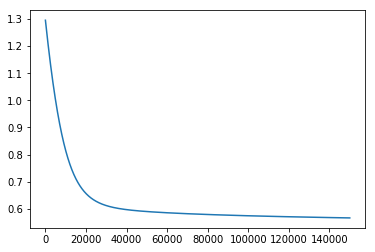

In [45]:
BetaCoefficients_0001 = logisticRegression_grad(betaArray,num_iter=150000, learning_rate = 0.0001 )

### Use sklearn logistic regression API and compare the estimation of beta values

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
logreg = LogisticRegression(C = 1e15)
logreg.fit(chd_final[Indep_vars],chd_final[dep_vars])

LogisticRegression(C=1000000000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [48]:
print(logreg.intercept_, logreg.coef_)
print('-'*80)
print('Betas for gradient descent approach_01:', BetaCoefficients_01)
print('-'*80)
print('Betas for gradient descent approach_001:', BetaCoefficients_001)
print('-'*80)
print('Betas for gradient descent approach_0001:', BetaCoefficients_0001)

[-2.97750423] [[ 0.76120349  2.47590956  2.49506913  0.66324897  2.57276739 -2.00422897
   0.01744179  2.21640778 -1.95143774 -1.02606649]]
--------------------------------------------------------------------------------
Betas for gradient descent approach_01: [-3.1225405   0.74516614  2.4685206   2.46968429  0.43327609  2.47167877
 -1.6409738   0.02562541  2.26321175 -1.76312393 -0.83995309]
--------------------------------------------------------------------------------
Betas for gradient descent approach_001: [-1.97628727  0.29320511  1.68978598  0.95392647  0.34205107  0.61051629
 -0.57511561  0.3218753   1.90569517 -1.19927398 -0.25754982]
--------------------------------------------------------------------------------
Betas for gradient descent approach_0001: [-1.00505803 -0.14967961  0.94733624  0.05327105  0.0220825   0.29291336
 -0.30959872  0.66463258  0.81117865 -0.66438257  0.17878801]


**Beta values are comparable to the sklearn beta values. Fine tuning will produce more similar beta's.**